In [252]:
#import to read in file
from google.colab import files
import io

#import numpy and pandas
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import *

#keras
import keras as k
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

#matplotlib
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [253]:
uploaded = files.upload()
book = pd.read_csv(io.BytesIO(uploaded['book.csv']))

Saving book.csv to book (3).csv


Example 1

In [254]:
#initializing predictors
print (book.tail)

#book['publication_year'] = pd.to_numeric(book['publication_year'])

#publication_year
features = ['language_bool', 'num_pages', 'ratings_count', 'text_reviews_count', 'review_bool']
predictors = ['language_bool', 'num_pages', 'ratings_count', 'text_reviews_count']
bookDF = book[features]
print(bookDF.shape)
bookDF.dropna(inplace = True)
print(bookDF.shape)

print (bookDF.tail)
#print (book.dtypes)

<bound method NDFrame.tail of        bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11118   45631   Expelled from Eden: A William T. Vollmann Reader   
11119   45633                        You Bright and Risen Angels   
11120   45634                    The Ice-Shirt (Seven Dreams #1)   
11121   45639                                        Poor People   
11122   45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                             J.K. Rowling/Mary GrandPré            4.57   
1

In [255]:
X = bookDF[predictors]
z = StandardScaler()
zScored = z.fit_transform(X)
bookDF[predictors] = zScored

In [256]:
# Split dataset into training set and test set
xPred = bookDF[predictors]

yClass = bookDF['review_bool']

X_train, X_test, y_train, y_test = train_test_split(xPred, yClass, test_size = 0.5) # 50% training and 50% test

In [257]:
#tensor conversion and processing
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train = tf.convert_to_tensor(X_train, dtype = tf.float64)
y_train = tf.convert_to_tensor(y_train, dtype = tf.float64)
X_test = tf.convert_to_tensor(X_test, dtype = tf.float64)
y_test = tf.convert_to_tensor(y_test, dtype = tf.float64)

In [258]:
#model and layers def
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [259]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))
model.evaluate(X_test, y_test)
results = model.evaluate(X_test, y_test)
print(results)


Epoch 1/20
9/9 [==============================] - 1s 23ms/step - loss: 0.6923 - acc: 0.5475 - val_loss: 0.6911 - val_acc: 0.5620
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 0.6863 - acc: 0.5861 - val_loss: 0.6859 - val_acc: 0.5650
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 0.6829 - acc: 0.5902 - val_loss: 0.6825 - val_acc: 0.5700
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 0.6803 - acc: 0.5904 - val_loss: 0.6803 - val_acc: 0.5670
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 0.6783 - acc: 0.5957 - val_loss: 0.6792 - val_acc: 0.5620
Epoch 6/20
9/9 [==============================] - 0s 7ms/step - loss: 0.6769 - acc: 0.5931 - val_loss: 0.6778 - val_acc: 0.5670
Epoch 7/20
9/9 [==============================] - 0s 5ms/step - loss: 0.6759 - acc: 0.5933 - val_loss: 0.6768 - val_acc: 0.5650
Epoch 8/20
9/9 [==============================] - 0s 8ms/step - loss: 0.6746 - acc: 0.5935 - val_loss: 

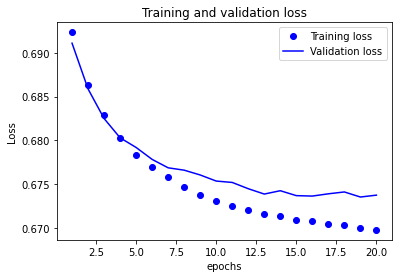

In [260]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

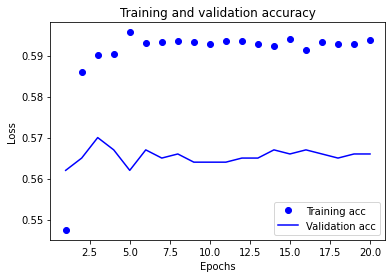

In [261]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Example 1: Further

In [262]:
#further experiments
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=20, batch_size=512)
results = model1.evaluate(X_test, y_test)
print(results)

Epoch 1/20
11/11 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.5596
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5869
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5873
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.5868
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5857
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.5878
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5869
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.5848
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5871
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5884
Epoch 11/20
11/11 [

In [263]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(4,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=20, batch_size=512)
results = model2.evaluate(X_test, y_test)
print(results)

Epoch 1/20
11/11 [==============================] - 1s 3ms/step - loss: 0.6828 - accuracy: 0.5776
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5893
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5905
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.5880
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.5862
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.5875
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.5860
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5866
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.5877
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.5882
Epoch 11/20
11/11 [

In [264]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=20, batch_size=512)
results = model3.evaluate(X_test, y_test)
print(results)

Epoch 1/20
11/11 [==============================] - 1s 2ms/step - loss: 0.2517 - accuracy: 0.5111
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.5833
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.5880
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.5877
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2417 - accuracy: 0.5882
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.5900
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.5895
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.5900
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.5904
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.5893
Epoch 11/20
11/11 [

In [265]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='tanh', input_shape=(4,)))
model4.add(layers.Dense(16, activation='tanh'))
model4.add(layers.Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=512)
results = model4.evaluate(X_test, y_test)
print(results)

Epoch 1/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6702 - acc: 0.5880
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6699 - acc: 0.5887
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6699 - acc: 0.5900
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6696 - acc: 0.5887
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6694 - acc: 0.5904
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6694 - acc: 0.5895
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6691 - acc: 0.5893
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6690 - acc: 0.5904
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6689 - acc: 0.5918
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6688 - acc: 0.5895
Epoch 11/20
11/11 [==============================] - 0s 2ms/step - lo

Example 2

In [266]:
#Publication year
features2 = ['average_rating', 'ratings_count', 'text_reviews_count', 'language_bool', 'pages_category']
predictors2 = ['average_rating', 'ratings_count', 'text_reviews_count', 'language_bool']

bookDF2 = book[features2]
print(bookDF2.shape)
bookDF2.dropna(inplace = True)
print(bookDF2.shape)


(11123, 5)
(11123, 5)


In [267]:
X2 = bookDF2[predictors2]
z2 = StandardScaler()
zScored = z.fit_transform(X2)
bookDF2[predictors2] = zScored

In [268]:
XPred2 = bookDF2[predictors2]
yClass2 = bookDF2['pages_category']

X_train2, X_test2, y_train2, y_test2 = train_test_split(XPred2, yClass2, test_size = 0.2, random_state = 33)

In [269]:
X_train2 = X_train2.to_numpy()
y_train2 = y_train2.to_numpy()

X_test2 = X_test2.to_numpy()
y_test2 = y_test2.to_numpy()

X_train2 = tf.convert_to_tensor(X_train2, dtype = tf.float64)
y_train2 = tf.convert_to_tensor(y_train2, dtype = tf.float64)
X_test2 = tf.convert_to_tensor(X_test2, dtype = tf.float64)
y_test2 = tf.convert_to_tensor(y_test2, dtype = tf.float64)

one_hot_train_labels = to_categorical(y_train2)
one_hot_test_labels = to_categorical(y_test2)

In [270]:
model5 = models.Sequential()
model5.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model5.add(layers.Dense(16, activation='relu'))
model5.add(layers.Dense(5, activation='softmax'))


In [271]:
model5.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [272]:
X_val2 = X_train2[:4000]
partial_X_train2 = X_train2[4000:]
y_val2 = one_hot_train_labels[:4000]
partial_y_train2 = one_hot_train_labels[4000:]

In [278]:
history = model.fit(partial_X_train2,
                    partial_y_train2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val2, y_val2))

Epoch 1/20


ValueError: ignored

In [274]:
results = model5.evaluate(X_test2, one_hot_test_labels)
print(results)

70/70 [==============================] - 0s 2ms/step - loss: 1.6744 - accuracy: 0.0503
[1.6744493246078491, 0.05033707991242409]


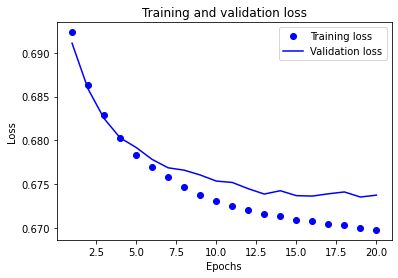

In [280]:
history_dict = history.history
history_dict.keys()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

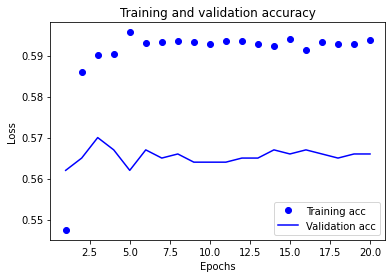

In [281]:
#training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [282]:
model6 = models.Sequential()
model6.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model6.add(layers.Dense(16, activation='relu'))
model6.add(layers.Dense(5, activation='softmax'))
model6.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model6.fit(partial_X_train2,
          partial_y_train2,
          epochs=6,
          batch_size=512,
          validation_data=(X_val2, y_val2))

results = model6.evaluate(X_test2, one_hot_test_labels)

Epoch 1/6
10/10 [==============================] - 3s 121ms/step - loss: 1.6835 - accuracy: 0.1729 - val_loss: 1.6398 - val_accuracy: 0.1980
Epoch 2/6
10/10 [==============================] - 0s 31ms/step - loss: 1.6184 - accuracy: 0.2115 - val_loss: 1.5923 - val_accuracy: 0.2355
Epoch 3/6
10/10 [==============================] - 0s 44ms/step - loss: 1.5757 - accuracy: 0.2519 - val_loss: 1.5527 - val_accuracy: 0.2800
Epoch 4/6
10/10 [==============================] - 0s 29ms/step - loss: 1.5390 - accuracy: 0.2981 - val_loss: 1.5174 - val_accuracy: 0.3198
Epoch 5/6
10/10 [==============================] - 0s 41ms/step - loss: 1.5065 - accuracy: 0.3230 - val_loss: 1.4855 - val_accuracy: 0.3390
Epoch 6/6
70/70 [==============================] - 0s 2ms/step - loss: 1.4564 - accuracy: 0.3452


In [279]:
results

[1.0601580142974854, 0.502471923828125]

In [283]:
predictions = model.predict(X_test2)

70/70 [==============================] - 0s 1ms/step


In [284]:
predictions[0].shape
print(np.sum(predictions[0]))
np.argmax(predictions[0])

0.3810634


0

In [285]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(4,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_X_train2,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(X_val2, y_val))

ValueError: ignored

Further experiments for example 2

In [286]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(14,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_X_train2,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(X_val2, y_val2))

results = model.evaluate(X_test2, one_hot_test_labels)
print("results: ", results)

ValueError: ignored

In [287]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(14,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_X_train2,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(X_val2, y_val2))

results = model.evaluate(X_test2, one_hot_test_labels)
print("results: ", results)

ValueError: ignored

example 3

In [288]:
features3 = ['average_rating', 'ratings_count', 'text_reviews_count', 'language_bool', 'num_pages']
predictors3 = ['average_rating', 'text_reviews_count', 'language_bool', 'num_pages']

bookDF3 = book[features3]
print(bookDF3.shape)
bookDF3.dropna(inplace = True)
print(bookDF3.shape)

(11123, 5)
(11123, 5)


In [289]:
X = bookDF3[predictors3]
z = StandardScaler() #trying standard scalar
zScored = z.fit_transform(X)
bookDF3[predictors3] = zScored

In [ ]:
bookDF3.head()

In [ ]:
# x = features
XPred3 = bookDF3[predictors3]
#set y = classification column
yClass3 = bookDF3['ratings_count']
#split into TT sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(XPred3, yClass3, test_size = 0.2, random_state = 68)

In [ ]:
X_train3 = X_train3.to_numpy()
y_train3 = y_train3.to_numpy()
X_test3 = X_test3.to_numpy()
y_test3 = y_test3.to_numpy()
X_train3 = tf.convert_to_tensor(X_train3, dtype = tf.float64)
y_train3 = tf.convert_to_tensor(y_train3, dtype = tf.float64)
X_test3 = tf.convert_to_tensor(X_test3, dtype = tf.float64)
y_test3 = tf.convert_to_tensor(y_test3, dtype = tf.float64)

In [ ]:
def build_model():
  model9 = models.Sequential()
  model9.add(layers.Dense(128, activation='relu',
                         input_shape=(X_train3.shape[1],)))
  model9.add(layers.Dense(128, activation='relu')) 
  model9.add(layers.Dense(128, activation='relu'))
  model9.add(layers.Dense(1))
  model9.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model9

In [ ]:
X_val3 = X_train3[:1000]
partial_X_train3 = X_train3[1000:]
y_val3 = y_train3[:1000]
partial_y_train3 = y_train3[1000:]

In [ ]:
model9 = build_model()
history = model9.fit(partial_X_train3,
                    partial_y_train3,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val3, y_val3),
                    verbose = 0)
val_mse, val_mae = model9.evaluate(X_val3, y_val3, verbose=0)

In [ ]:
print("val_mse: ", val_mse)
print("val_mae: ", val_mae)

In [ ]:
k=4
num_val_samples = len(X_train3) // k
num_epochs = 100
all_scores = []

In [ ]:
for i in range(k):
  print('processing fold #', i)
  val_data = X_train3[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train3[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [X_train3[:i * num_val_samples],
       X_train3[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [y_train3[:i * num_val_samples],
       y_train3[(i + 1) * num_val_samples:]],
       axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)